## Question answering with Data #1

**Author**: [Sayak Paul](https://sites.google.com/view/spsayakpaul)

In this study, I explore a dataset which contains information of students who got graduated from a certain college in the year 2017. I ask several questions to the dataset which are practical according to me and eventually find their answers. I also try to present these answers in a nice graphical way. 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp 
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Set jupyter's max row display
pd.set_option('display.max_row', 1000)

# Set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

plt.style.use('ggplot')
%matplotlib inline

In [8]:
data_2017 = pd.read_excel('2017_Batch_NSEC.xlsx')
data_2017.head()

,SL.NO.,STUDENT'S COLLEGE ID,DEPARTMENT (ABBR.),STUDENT'S FULL NAME,FIRST NAME,MIDDLE NAME,LAST NAME,TCS-CT REFERENCE NUMBER,GENDER (M/F),D.O.B (DD/MM/YYYY),AGE (IN YRS.),BLOOD GROUP,CATEGORY,RELIGION,NATIONALITY,PLACE OF DOMICILE (PLACE-DISTRICT-STATE),(STD CODE)(RESIDENCE LANDLINE NUMBER),STUDENT'S MOBILE CONTACT NO.,STUDENT'S ALTERNATIVE MOBILE CONTACT NO.,PRIMARY E-MAIL ID,SECONDARY E-MAIL ID,NAME OF EXAMINATION - CLASS X,NAME OF BOARD - CLASS X,NAME OF SCHOOL(IN FULL)-CLASS X,SUBJECT COMINATION (DO NOT USE ABBR.)-CLASS X,...,CERTIFICATIONS (ACADEMIC),CERTIFICATIONS (NON ACADEMIC),FATHER'S NAME,FATHER'S OCCUPATION,ORGANIZATION,DESIGNATION,MOTHER'S NAME,MOTHER'S OCCUPATION,ORGANIZATION.1,DESIGNATION.1,GUARDIAN'S NAME(IN ABSENCE OF EITHER OF THE PARENTS),GUARDIAN'S OCCUPATION,ORGANIZATION.2,DESIGNATION.2,RELATIONSHIP WITH GUARDIAN,PERMANENT - ADDRESS FOR CORRESPONDENCE (IN FULL),PERMANENT LOCATION (PLACE - CITY/TOWN/VILLAGE),PERMANENT LOCATION (DISTRICT),PERMANENT LOCATION (STATE),PERMANENT LOCATION (PIN CODE),PRESENT ADDRESS (IN FULL),PRESENT LOCATION (PLACE - CITY/TOWN/VILLAGE),PRESENT LOCATION (DISTRICT),PRESENT LOCATION (STATE),PRESENT LOCATION (PINCODE)
0,1,1.310905e+09,AEIE,AADITI CHAKRABORTY,AADITI,NaN,CHAKRABORTY,CT20151654070,F,17/10/1994,21,A+,GENERAL,HINDUISM,INDIAN,NETAJI NAGAR-KOLKATA-WEST BENGAL,033-24115328,(+91)7688043266,(+91)8017935218,aaditichakraborty@gmail.com,ashis_aadi@yahoo.com,I.C.S.E,COUNCIL FOR THE INDIAN SCHOOL CERTIFICATE EXAM...,RAM MOHAN MISSION HIGH SCHOOL,"ENGLISH, BENGALI, ENVIRONMENTAL EDUCATION, HIS...",...,"VT - MEJIA THERMAL POWER STATION ,DVC",PAINTING,ASHIS CHAKRABORTY,RETIRED,PSU,OFFICER (IA),RINA CHAKRABORTY,HOME MAKER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1/7 NETAJI NAGAR, P0:REGENT ESTATE, KOLKATA-70...",KOLKATA,24 PARGANAS(SOUTH),WEST BENGAL,700092,"1/7 NETAJI NAGAR, P0: REGENT ESTATE, KOLKATA-7...",KOLKATA,24 PARGANAS(SOUTH),WEST BENGAL,700092
1,2,1.310905e+09,AEIE,AAYUSI PRIYA,AAYUSI,NaN,PRIYA,CT20161901276,F,1995-02-08 00:00:00,21,B+,OBC,HINDUISM,INDIAN,"BARIARPUR BAZAR BARIARPUR,MUNGER-BIHAR",06344-265304,(+91)7686977130,(+91)9883789281,aayusipriya60@gmail.com,NaN,"SECONDARY SCHOOL EXAMINATION,2011","B.S.E.B,PATNA",GIRLS HIGH SCHOOL,"HINDI,SANSKRIT,MATHEMATICS,SCIENCE,SOCIAL SCIE...",...,PROJECT ON INSTRUMENTATION &CONTROL SYSTEM,NaN,ANIL PRASAD SAH,SERVICE MAN,FISHRISH DEPT.,SUPERVISOR,REETA DEVI,HOUSE WIFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"C/O:-MAHENDRA PRASAD SAH ,BARIARPUR BAZAR BARI...",BARIARPUR BAZAR BARIARPUR,MUNGER,BIHAR,811211,"C/O:-DILIP GANGULY,SHAHID KHUDIRAM SARANI ,PUN...",KOLKATA,KOLKATA,WEST BENGAL,700152
2,3,1.310905e+09,AEIE,ABHINAV KUMAR,ABHINAV,NaN,KUMAR,CT20151650002,M,14/12/1995,20,B+,GENERAL,HINDUISM,INDIAN,"DHANBAD, JHARKHAND",NaN,(+91)7278046329,(+91)8507622492,abhilal1412@gmail.com,NaN,ALL INDIA SENIOR SECONDARY EXAMINATION,CENTRAL BOARD OF SECONDARY EDUCATION,"J L M MEMORIAL SR. SEC. SCHOOL DIGWADIH, DHANBAD","HINDI COURSE-A, MATHEMATICS, SCIENCE, SOCIAL S...",...,VOCATIONAL TRAINING AT HEC RANCHI,NaN,PRABHAKAR KUMAR LAL DAS,RETIRED,"DRDA, STATE GOVERNMENT",CASHIER,AMBUJ DAS,HOUSEWIFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"B.D.O. OFFICE BLOCK QUARTER CAMPUS,CHIRAGORA,H...",DHANBAD,DHANBAD,JHARKHAND,826001,"C/O- RAJAT KANTI DUTTA, AT- DHALUA, P.O- DHALU...","GARIA STATION,KOLKATA",SOUTH 24-PARGANAS,WEST BENGAL,700152
3,4,1.310905e+09,AEIE,ADRIJA ROY,ADRIJA,NaN,ROY,CT20151652326,F,21/02/1995,21,0+,GENERAL,HINDUISM,INDIAN,BUDGE BUDGE-24 PARGANAS(SOUTH)-WEST BENGAL,(033)24703701,(+91)9163698099,(+91)9432240593,adrijaroy83@gmail.com,groy@hpcl.in,MADHYAMIK PARIKSHA,WEST BENGAL BOARD OF SECONDARY EDUCATION,BIDYA BHARATI GIRLS' HIGH SCHOOL,"BENGALI,ENGLISH, MATHEMATICS,PHYSICAL SCIENCE,...",...,VACATIONAL TRAINING AT CESC LIMITED; PROJECT T...,"SITAR (2ND YEAR), ARTS(completed 4th year)",GOUTAM ROY,SERVICE,HINDUSTAN PETROLEUM CORPORATION LIMITED,FINANCE SUPERINTENDENT,SEULI ROY,HOUSE WIFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"50/8, MAHATMA GANDHI ROAD, BUDGE BUDGE, 24 PAR...","BUDGE BUDGE,

## 1. What is the total number of students this dataset has? 

In [9]:
data_2017.shape

(671, 104)

* 670 - The number of students. This is 1 less than 671 because 671 contains the header row as well. 
* 104 - Columns

## 2. What kind of information does this dataset convey? 

In [10]:
list(data_2017)

['SL.NO.',
 "STUDENT'S COLLEGE ID",
 'DEPARTMENT (ABBR.)',
 "STUDENT'S FULL NAME",
 'FIRST NAME',
 'MIDDLE NAME',
 'LAST NAME',
 'TCS-CT REFERENCE NUMBER',
 'GENDER (M/F)',
 'D.O.B (DD/MM/YYYY)',
 'AGE (IN YRS.)',
 'BLOOD GROUP',
 'CATEGORY',
 'RELIGION',
 'NATIONALITY',
 'PLACE OF DOMICILE (PLACE-DISTRICT-STATE)',
 '(STD CODE)(RESIDENCE LANDLINE NUMBER)',
 "STUDENT'S MOBILE CONTACT NO.",
 "STUDENT'S ALTERNATIVE MOBILE CONTACT NO.",
 'PRIMARY E-MAIL ID',
 'SECONDARY E-MAIL ID',
 'NAME OF EXAMINATION - CLASS X',
 'NAME OF BOARD - CLASS X',
 'NAME OF SCHOOL(IN FULL)-CLASS X',
 'SUBJECT COMINATION (DO NOT USE ABBR.)-CLASS X',
 'MEDIUM OF INSTRUCTION-CLASS X',
 'Y.O.P - CLASS X',
 'STANDARD % OF CLASS X',
 'ACTUAL % OF CLASS X',
 'TOTAL MARKS OBTAINED IN ALL THE SUBJECTS IN CLASS X',
 'TOTAL MARKS OF EXAM APPEARED IN CLASS X',
 'NAME OF EXAMINATION - CLASS XII',
 'NAME OF BOARD/COUNCIL - CLASS XII',
 'NAME OF SCHOOL(IN FULL) - CLASS XII',
 'SUBJECT COMINATION (DO NOT USE ABBR.) - CLASS XII

## 3. Are there any missing values in the dataset? 

In [11]:
data_2017.isna().sum()

SL.NO.                                                      0
STUDENT'S COLLEGE ID                                        1
DEPARTMENT (ABBR.)                                          0
STUDENT'S FULL NAME                                         0
FIRST NAME                                                  1
MIDDLE NAME                                               594
LAST NAME                                                   8
TCS-CT REFERENCE NUMBER                                    78
GENDER (M/F)                                                0
D.O.B (DD/MM/YYYY)                                          0
AGE (IN YRS.)                                               0
BLOOD GROUP                                                57
CATEGORY                                                    1
RELIGION                                                    0
NATIONALITY                                                 0
PLACE OF DOMICILE (PLACE-DISTRICT-STATE)                    4
(STD COD

> ***Instant observation***: A student has left out his first name! Let's find out who.

In [12]:
data_2017[data_2017['FIRST NAME'].isna()==True]

,SL.NO.,STUDENT'S COLLEGE ID,DEPARTMENT (ABBR.),STUDENT'S FULL NAME,FIRST NAME,MIDDLE NAME,LAST NAME,TCS-CT REFERENCE NUMBER,GENDER (M/F),D.O.B (DD/MM/YYYY),AGE (IN YRS.),BLOOD GROUP,CATEGORY,RELIGION,NATIONALITY,PLACE OF DOMICILE (PLACE-DISTRICT-STATE),(STD CODE)(RESIDENCE LANDLINE NUMBER),STUDENT'S MOBILE CONTACT NO.,STUDENT'S ALTERNATIVE MOBILE CONTACT NO.,PRIMARY E-MAIL ID,SECONDARY E-MAIL ID,NAME OF EXAMINATION - CLASS X,NAME OF BOARD - CLASS X,NAME OF SCHOOL(IN FULL)-CLASS X,SUBJECT COMINATION (DO NOT USE ABBR.)-CLASS X,...,CERTIFICATIONS (ACADEMIC),CERTIFICATIONS (NON ACADEMIC),FATHER'S NAME,FATHER'S OCCUPATION,ORGANIZATION,DESIGNATION,MOTHER'S NAME,MOTHER'S OCCUPATION,ORGANIZATION.1,DESIGNATION.1,GUARDIAN'S NAME(IN ABSENCE OF EITHER OF THE PARENTS),GUARDIAN'S OCCUPATION,ORGANIZATION.2,DESIGNATION.2,RELATIONSHIP WITH GUARDIAN,PERMANENT - ADDRESS FOR CORRESPONDENCE (IN FULL),PERMANENT LOCATION (PLACE - CITY/TOWN/VILLAGE),PERMANENT LOCATION (DISTRICT),PERMANENT LOCATION (STATE),PERMANENT LOCATION (PIN CODE),PRESENT ADDRESS (IN FULL),PRESENT LOCATION (PLACE - CITY/TOWN/VILLAGE),PRESENT LOCATION (DISTRICT),PRESENT LOCATION (STATE),PRESENT LOCATION (PINCODE)
484,485,1.410904e+09,EE,SAHRBANU,NaN,NaN,NaN,CT20161852951,F,22/01/1995,21,B+,OBC,MUSLIM,INDIAN,"VILL-ANDIPUR,BIRBHUM,WEST BENGAL",91 9745365524,91 7407807024,NaN,saharbanu666@gmail.com,saharbanuadori@gmail.com,MADHYAMIK EXAMINATION,WEST BENGAL BOARD OF SECONDARY EXAMINATION,JOGAI ANDIPUR HIGH SCHOOL,"FIRST LANGUAGE-(1ST PAPER),FIRST LANGUAGE-(2ND...",...,NaN,NaN,AMIR HOSSAIN,SELF EMPLOYEE,NaN,NaN,MAUNZERA BIBI,HOUSE WIFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"VILL-ANDIPUR,P.O-JOGAI,P.S-MURARAI,DIST-BIRBHU...","VILL-ANDIPUR,CITY-RAMPURHAT",BIRBHUM,WEST BENGAL,731238,"GORIA,PANCHPOTA,KOLKATA-700152","GORIA,KOLKATA-700152",KOLKATA,WEST BENGAL,700152


In [13]:
# Rename the long name without loss in its meaning
data_2017.rename(columns={'DEPARTMENT (ABBR.)': 'Department'}, inplace=True)

## 4. How many departments are there in the dataset?

In [14]:
set(data_2017.Department.values)

{'AEIE', 'BME', 'CE', 'CSE', 'ECE', 'EE', 'IT', 'ME'}

* AEIE - Applied Electronics and Instrumentation Engg.
* BME - Biomedical Engg.
* CE - Civil Engg.
* CSE - Computer Science and Engg.
* ECE - Electronics and Communication Engg.
* EE - Electrical Engg.
* IT - Information Technology
* ME - Mechanical Engg.

## 5. What is the student count per department?

In [15]:
data_2017.groupby('Department')['SL.NO.'].count().reset_index(name='No. of students')

,Department,No. of students
0,AEIE,54
1,BME,24
2,CE,68
3,CSE,136
4,ECE,125
5,EE,125
6,IT,79
7,ME,60


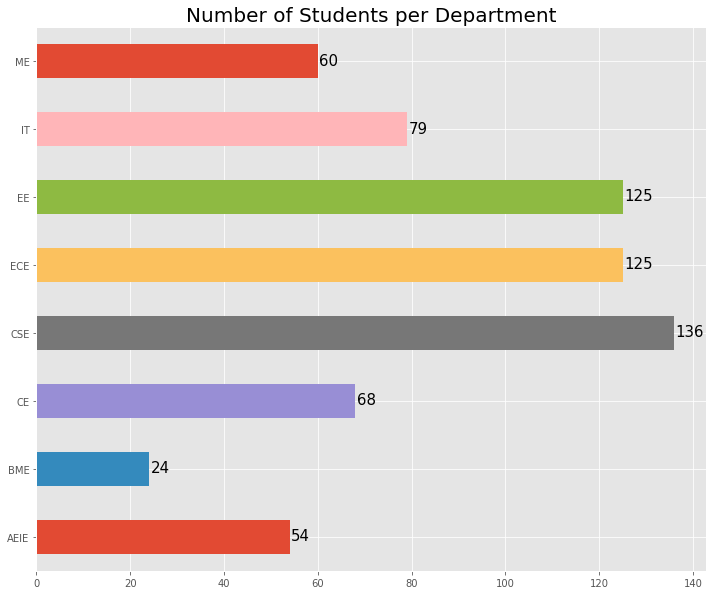

In [16]:
subplot = data_2017.groupby('Department')['SL.NO.'].count().plot(kind='barh',figsize=(12,10))
subplot.set_ylabel('')
subplot.set_title('Number of Students per Department', fontsize = 20)
for i in subplot.patches:
    # get_width pulls left or right; get_y pushes up or down
    subplot.text(i.get_width()+.3, i.get_y()+.2, \
            str(i.get_width()), fontsize=15,)

## 6. What is the highest semester grade obtained by a student from a particular department?

In [17]:
data_2017.groupby('Department')['SEM AVG'].max().reset_index(name = 'Highest Average Semester Grade')

,Department,Highest Average Semester Grade
0,AEIE,8.950
1,BME,8.966
2,CE,9.432
3,CSE,9.540
4,ECE,9.502
5,EE,9.268
6,IT,8.726
7,ME,9.006


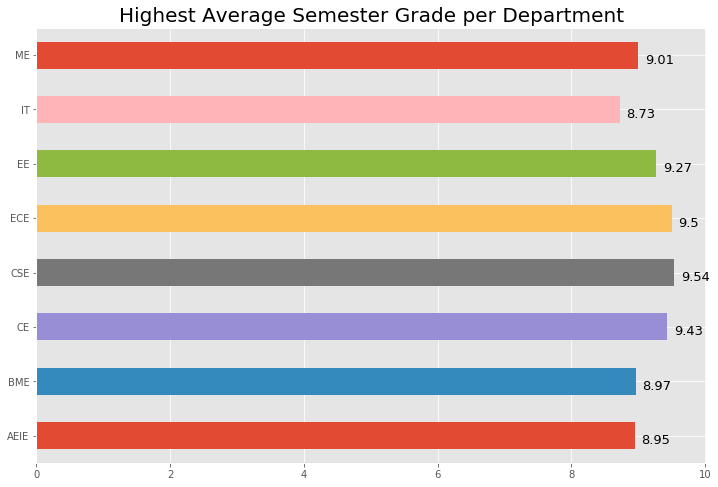

In [18]:
subplot = data_2017.groupby('Department')['SEM AVG'].max().plot(kind='barh',figsize=(12,8))
subplot.set_ylabel('')
subplot.set_title('Highest Average Semester Grade per Department', fontsize = 20)
for i in subplot.patches:
    # get_width pulls left or right; get_y pushes up or down
    subplot.text(i.get_width()+.1, i.get_y()+.1, \
            str(round(i.get_width(),2)), fontsize=13)

In [19]:
data_2017[data_2017['Department'] == 'IT'][['STUDENT\'S FULL NAME', 'SEM AVG']].head()

,STUDENT'S FULL NAME,SEM AVG
532,ABHIJIT KUMAR,7.132
533,ABHISHEK GUPTA,6.826
534,ADITI RAY,8.040
535,AISHIK CHOUDHURY,6.610
536,AISHWARYA DEY,7.582


## 7. Students from different states took admission in this college. What is the state-wise student count?

In [20]:
data_2017['PERMANENT LOCATION (STATE)'].value_counts()

WEST BENGAL                    480
BIHAR                           94
JHARKHAND                       44
WESTBENGAL                      18
WEST BENGAL                      6
West Bengal                      5
TRIPURA                          5
WEST-BENGAL                      3
 WEST BENGAL                     2
WB                               2
WEST BINGAL                      1
                WEST BENGAL      1
INDIA                            1
               WEST BENGAL       1
UTTARAKHAND                      1
               JHARKHAND         1
West bengal                      1
DELHI                            1
WEST BENGAL.                     1
Name: PERMANENT LOCATION (STATE), dtype: int64

For the same state **West Bengal**, we have several variants like WB, WEST-BENGAL and so on. There are even cases where several spaces are appended before the word. Let's try to give it a proper shape. Otherwise, the numbers will be faulty. We will stick to the name `WEST BENGAL` and will replace the other variants accordingly. We have this problem for other states as well. 

**Quick observation**: A candidate has even given India as his/her state)

In [21]:
# Manual engineering but okay! Can be written in an efficient manner using regex
# The correct entries have also been specified. This is to avoid the entry of NaNs. 
data_2017['PERMANENT LOCATION (STATE)'] = data_2017['PERMANENT LOCATION (STATE)'] .map({'WESTBENGAL':'WEST BENGAL',
'WEST BENGAL':'WEST BENGAL', 'West Bengal':'WEST BENGAL', 'WEST-BENGAL':'WEST BENGAL',
' WEST BENGAL':'WEST BENGAL', 'WB':'WEST BENGAL','West bengal':'WEST BENGAL', 'WEST BINGAL': 'WEST BENGAL',
'               WEST BENGAL':'WEST BENGAL', '                WEST BENGAL':'WEST BENGAL','WEST BENGAL.':'WEST BENGAL',
'               JHARKHAND':'JHARKHAND','BIHAR':'BIHAR','TRIPURA':'TRIPURA','JHARKHAND':'JHARKHAND','UTTARAKHAND':'UTTARAKHAND',
'DELHI':'DELHI','INDIA':'INDIA'})

In [22]:
no_students_state_wise = data_2017['PERMANENT LOCATION (STATE)'].value_counts().reset_index(name='Number of students')
no_students_state_wise.rename(columns={'index':'State'},inplace=True)
no_students_state_wise

,State,Number of students
0,WEST BENGAL,515
1,BIHAR,94
2,JHARKHAND,45
3,TRIPURA,5
4,DELHI,1
5,INDIA,1
6,UTTARAKHAND,1


Looks much more tidy now! Can we plot this? Of course!

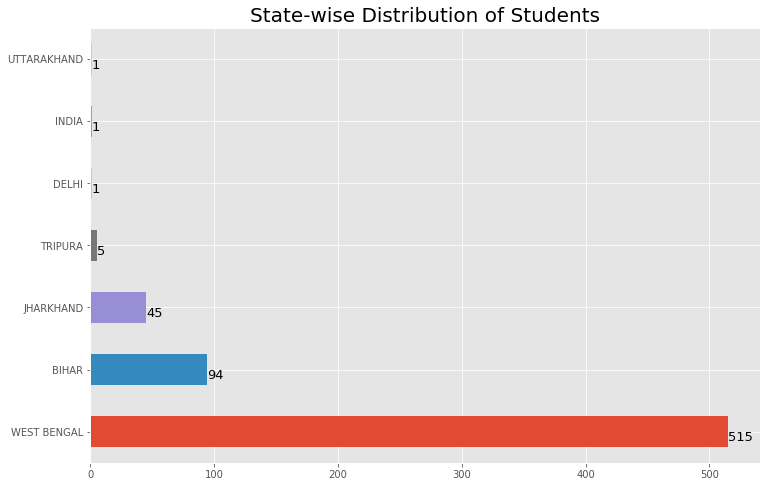

In [23]:
subplot = data_2017['PERMANENT LOCATION (STATE)'].value_counts().plot(kind='barh',figsize=(12,8))
subplot.set_ylabel('')
subplot.set_title('State-wise Distribution of Students', fontsize = 20)
for i in subplot.patches:
    # get_width pulls left or right; get_y pushes up or down
    subplot.text(i.get_width()+.1, i.get_y()+.1, \
            str(round(i.get_width(),2)), fontsize=13)

The value **India** is really becoming intolerable to my eyes. I am going drop the row corresponding to it. 

In [24]:
data_2017[data_2017['PERMANENT LOCATION (STATE)'] == 'INDIA']

,SL.NO.,STUDENT'S COLLEGE ID,Department,STUDENT'S FULL NAME,FIRST NAME,MIDDLE NAME,LAST NAME,TCS-CT REFERENCE NUMBER,GENDER (M/F),D.O.B (DD/MM/YYYY),AGE (IN YRS.),BLOOD GROUP,CATEGORY,RELIGION,NATIONALITY,PLACE OF DOMICILE (PLACE-DISTRICT-STATE),(STD CODE)(RESIDENCE LANDLINE NUMBER),STUDENT'S MOBILE CONTACT NO.,STUDENT'S ALTERNATIVE MOBILE CONTACT NO.,PRIMARY E-MAIL ID,SECONDARY E-MAIL ID,NAME OF EXAMINATION - CLASS X,NAME OF BOARD - CLASS X,NAME OF SCHOOL(IN FULL)-CLASS X,SUBJECT COMINATION (DO NOT USE ABBR.)-CLASS X,...,CERTIFICATIONS (ACADEMIC),CERTIFICATIONS (NON ACADEMIC),FATHER'S NAME,FATHER'S OCCUPATION,ORGANIZATION,DESIGNATION,MOTHER'S NAME,MOTHER'S OCCUPATION,ORGANIZATION.1,DESIGNATION.1,GUARDIAN'S NAME(IN ABSENCE OF EITHER OF THE PARENTS),GUARDIAN'S OCCUPATION,ORGANIZATION.2,DESIGNATION.2,RELATIONSHIP WITH GUARDIAN,PERMANENT - ADDRESS FOR CORRESPONDENCE (IN FULL),PERMANENT LOCATION (PLACE - CITY/TOWN/VILLAGE),PERMANENT LOCATION (DISTRICT),PERMANENT LOCATION (STATE),PERMANENT LOCATION (PIN CODE),PRESENT ADDRESS (IN FULL),PRESENT LOCATION (PLACE - CITY/TOWN/VILLAGE),PRESENT LOCATION (DISTRICT),PRESENT LOCATION (STATE),PRESENT LOCATION (PINCODE)
249,250,1.310901e+09,CSE,SOURAV DAS,SOURAV,NaN,DAS,CT20161856394,M,07/11/1994,21,B+,GENERAL,HINDU,INDIAN,"KOLKATA, WEST-BENGAL",(033)25307318,8599922556,9831171872,srvds7th@hotmail.com,NaN,MADHYAMIK PARIKSHA,WBSE,THE SCOTTISH CHURCH COLLEGIATE SCHOOL,"BENGALI PAPER 1, BENGALI PAPER 2, ENGLISH, MAT...",...,NaN,SANGEET BIVAKAR DEGREE WITH DISTINCTION IN NAJ...,SUBIR KUMAR DAS,SERVICE,AIR INDIA LIMITED,"MANAGER, SERVICE ENGINEER",RITA DAS,HOUSE WIFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"13/1, FAKIR CHAKRABORTY LANE, KOLKATA - 700006...",KOLKATA,WEST-BENGAL,INDIA,700006,"13/1, FAKIR CHAKRABORTY LANE, KOLKATA - 700006...",KOLKATA,WEST-BENGAL,INDIA,700006


In [25]:
data_2017.drop(index=249, inplace=True)

In [26]:
data_2017[data_2017['PERMANENT LOCATION (STATE)'] == 'INDIA']

,SL.NO.,STUDENT'S COLLEGE ID,Department,STUDENT'S FULL NAME,FIRST NAME,MIDDLE NAME,LAST NAME,TCS-CT REFERENCE NUMBER,GENDER (M/F),D.O.B (DD/MM/YYYY),AGE (IN YRS.),BLOOD GROUP,CATEGORY,RELIGION,NATIONALITY,PLACE OF DOMICILE (PLACE-DISTRICT-STATE),(STD CODE)(RESIDENCE LANDLINE NUMBER),STUDENT'S MOBILE CONTACT NO.,STUDENT'S ALTERNATIVE MOBILE CONTACT NO.,PRIMARY E-MAIL ID,SECONDARY E-MAIL ID,NAME OF EXAMINATION - CLASS X,NAME OF BOARD - CLASS X,NAME OF SCHOOL(IN FULL)-CLASS X,SUBJECT COMINATION (DO NOT USE ABBR.)-CLASS X,...,CERTIFICATIONS (ACADEMIC),CERTIFICATIONS (NON ACADEMIC),FATHER'S NAME,FATHER'S OCCUPATION,ORGANIZATION,DESIGNATION,MOTHER'S NAME,MOTHER'S OCCUPATION,ORGANIZATION.1,DESIGNATION.1,GUARDIAN'S NAME(IN ABSENCE OF EITHER OF THE PARENTS),GUARDIAN'S OCCUPATION,ORGANIZATION.2,DESIGNATION.2,RELATIONSHIP WITH GUARDIAN,PERMANENT - ADDRESS FOR CORRESPONDENCE (IN FULL),PERMANENT LOCATION (PLACE - CITY/TOWN/VILLAGE),PERMANENT LOCATION (DISTRICT),PERMANENT LOCATION (STATE),PERMANENT LOCATION (PIN CODE),PRESENT ADDRESS (IN FULL),PRESENT LOCATION (PLACE - CITY/TOWN/VILLAGE),PRESENT LOCATION (DISTRICT),PRESENT LOCATION (STATE),PRESENT LOCATION (PINCODE)


The intended record has been successfully deleted. 

## 8. How did the toppers perform in their high school examinations?

In [27]:
toppers = data_2017.groupby('Department')['SEM AVG'].transform(max) == data_2017['SEM AVG']
data_2017[toppers][['STUDENT\'S FULL NAME', 'Department', 'SEM AVG',
                    'ACTUAL % OF CLASS XII','NAME OF BOARD/COUNCIL - CLASS XII']]

,STUDENT'S FULL NAME,Department,SEM AVG,ACTUAL % OF CLASS XII,NAME OF BOARD/COUNCIL - CLASS XII
3,ADRIJA ROY,AEIE,8.950,84.57,WEST BENGAL BOARD OF HIGHER SECONDARY EXAMINATION
63,POULAMI MONDAL,BME,8.966,81.50,COUNCIL FOR THE INDIAN SCHOOL CERTIFICATE EXAM...
90,ANKUR PAUL,CE,9.432,92.00,COUNCIL FOR INDIAN SCHOOL CERTIFICATE EXAMINATION
238,SHILPA CHATTERJEE,CSE,9.540,82.72,WBCHSE
295,ANURADHA DUTTA,ECE,9.502,87.28,WEST BENGAL COUNCIL OF HIGHER SECONDARY EXAMIN...
454,MONIKUNTALA BHATTACHARYA,EE,9.268,88.57,WBCHSE
606,TANUSREE SIKDER,IT,8.726,89.17,COUNCIL FOR THE INDIAN SCHOOL CERTIFICATE EXAM...
645,SANKHADEEP GHOSH,ME,9.006,91.80,COUNCIL FOR THE INDIAN SCHOOL CERTIFICATE EXAM...


(WEST BENGAL BOARD OF HIGHER SECONDARY EXAMINATION and WBCHSE are the same.)

We see that toppers were pretty good in terms of marks in their high-school examinations. Now, this has something to do with the **BOARD/COUNCIL** to which their schools were affiliated. Because, getting 90% from WBCHSE was actually a lot more harder than getting 90% (or above) from any other boards back then.

## 9.  How the semester grades of the toppers have changed over time?

In [28]:
data_2017[toppers][['FIRST NAME','Department','SEM 1', 'SEM 2', 'SEM 3', 'SEM 4', 'SEM 5']]

,FIRST NAME,Department,SEM 1,SEM 2,SEM 3,SEM 4,SEM 5
3,ADRIJA,AEIE,8.59,8.45,9.04,9.59,9.08
63,POULAMI,BME,8.52,8.90,9.14,9.04,9.23
90,ANKUR,CE,8.78,9.38,9.62,9.62,9.76
238,SHILPA,CSE,9.11,9.86,9.34,9.54,9.85
295,ANURADHA,ECE,9.22,9.72,9.72,9.23,9.62
454,MONIKUNTALA,EE,9.30,9.00,9.26,9.57,9.21
606,TANUSREE,IT,7.48,8.83,8.86,9.27,9.19
645,SANKHADEEP,ME,8.96,9.14,8.8,9.31,8.82


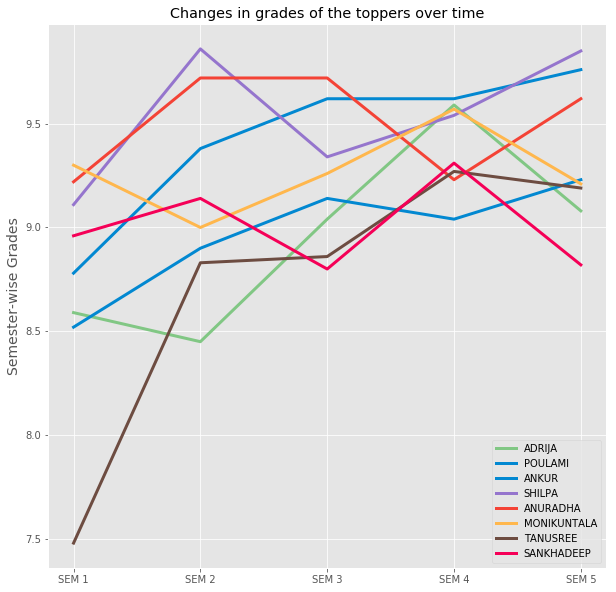

In [29]:
color=['#81c784','#0288d1','#0288d1','#9575cd','#f44336','#ffb74d','#6d4c41','#f50057']

fig, ax = plt.subplots(figsize=(10,10))
ax.set_ylabel('Semester-wise Grades',fontsize=14)
ax.set_title('Changes in grades of the toppers over time')
for i,c in zip(range(len(data_2017[toppers][['FIRST NAME','Department','SEM 1', 'SEM 2', 'SEM 3', 'SEM 4', 'SEM 5']])),color):
    ax.plot(['SEM 1', 'SEM 2', 'SEM 3', 'SEM 4', 'SEM 5'], 
            data_2017[toppers][['SEM 1', 'SEM 2', 'SEM 3', 'SEM 4', 'SEM 5']].iloc[i], 
            color=c, linewidth=3,label=data_2017[toppers]['FIRST NAME'].iloc[i])
    
ax.legend(loc='lower right')

Looks like **Tanushree** has really improved a lot. Kudos to her for that!

## 10. Students gave different entrance examinations to get their admissions. How many different entrance examinations are there in the dataset?


In [30]:
data_2017['NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'].value_counts()

WBJEE                       533
JELET                        83
JEE-MAINS                    44
WBJEE                         3
DE-CENTRALISED ADMISSION      2
WBJEE & JEE-MAINS             1
JELET                         1
Name: NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.), dtype: int64

We have inconsistency in the data. We have dealt with a similar kind inconsistency moments back. 

In [31]:
data_2017['NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'] = \
data_2017['NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'] .map({'WBJEE':'WBJEE',
'JELET':'JELET', 'JEE-MAINS':'JEE-MAINS','DE-CENTRALISED ADMISSION':'DE-CENTRALISED ADMISSION',
'WBJEE & JEE-MAINS':'WBJEE & JEE-MAINS'})

In [32]:
data_2017['NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'].value_counts()

WBJEE                       533
JELET                        83
JEE-MAINS                    44
DE-CENTRALISED ADMISSION      2
WBJEE & JEE-MAINS             1
Name: NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.), dtype: int64

In [33]:
data_2017[data_2017['NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'].isna()==True]\
[['FIRST NAME','Department','NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)']]

,FIRST NAME,Department,NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)
130,SOUSTAV,CE,NaN
156,ANKIT,CSE,NaN
226,RITURAJ,CSE,NaN
515,SUBHAJIT,EE,NaN
581,RAVI,IT,NaN
586,SAURAV,IT,NaN
617,AMIT,ME,NaN


It turns out some the students did not specify their entrance examination details. So, we will have to ignore them. 

In [34]:
data_2017.ix[130, 'NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'] = 'JELET'
data_2017.ix[581, 'NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'] = 'WBJEE'
data_2017.ix[586, 'NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'] = 'WBJEE'
data_2017.ix[617, 'NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'] = 'WBJEE'

In [35]:
data_2017['NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.)'].value_counts()

WBJEE                       536
JELET                        84
JEE-MAINS                    44
DE-CENTRALISED ADMISSION      2
WBJEE & JEE-MAINS             1
Name: NAME OF JOINT ENTRANCE (WBJEE/JEE-MAINS/JELET ETC.), dtype: int64

There are total 84 **lateral** candidates. 

> A number of students have got backlogs throughout their coursework. What is the total number of backlogs in each of the departments?

## 11. What is the total number of backlogs in each of the departments?

In [139]:
data_2017[data_2017['IF YES, MENTION NUMBER OF BACKLOG(S)'].isna()==False]\
        [['STUDENT\'S FULL NAME','IF YES, MENTION NUMBER OF BACKLOG(S)']].sample(20)

,STUDENT'S FULL NAME,"IF YES, MENTION NUMBER OF BACKLOG(S)"
624,ATHARVA PRAKASH,2
277,Sandipan das,7
649,SOUNAK CHATTOPADHYAY,4
215,POULAMI GANGULY,1
127,SHUVAMOY DEBNATH,2
213,PAYEL BANERJEE,3
365,SHILADITYA CHAKRABORTY,1
33,SANCHITA SAHA,"2ND SEM- MATHEMATICS II , BASIC COMPUTATION AN..."
404,GAURAV PANDEY,-
605,TANMOY BOSE,1


The noise is real here. Some students have specified the subjects in which they got their backlogs instead of specifying numbers. Some specified 'N/A', '-', 'NO', 'NIL' and so on to denote that they did not get any backlogs. While the instruction for non-backlog candidates was to not specify anything and leave the field as it is. 

There are many ways to fix this. We will explore a one or two - 

In [151]:
data_2017[data_2017['IF YES, MENTION NUMBER OF BACKLOG(S)'].str.isalnum()==True]\
    [['STUDENT\'S FULL NAME','IF YES, MENTION NUMBER OF BACKLOG(S)']]

,STUDENT'S FULL NAME,"IF YES, MENTION NUMBER OF BACKLOG(S)"
76,SANDIPAN SARKAR,M302
77,SANTANU MANDAL,M302
264,TAPAS BHUL,NIL
425,BHAGAWAN SHEE,NO
460,NILADRI SEKHAR SINHA,NO
562,FAZLEA KARIM,ONE
583,RITESH ROY,NO


In [153]:
data_2017[data_2017['IF YES, MENTION NUMBER OF BACKLOG(S)'].str.match('^[a-zA-Z0-9]+$')==False]\
        [['STUDENT\'S FULL NAME','IF YES, MENTION NUMBER OF BACKLOG(S)']]

,STUDENT'S FULL NAME,"IF YES, MENTION NUMBER OF BACKLOG(S)"
33,SANCHITA SAHA,"2ND SEM- MATHEMATICS II , BASIC COMPUTATION AN..."
74,BABLA SARKAR,1.MATHEMATICS-III
211,SAIKAT BANERJEE,"PHYSICS-II,MICROPROCESSOR,DISCRETE MATHEMATICS"
212,DIPTESH DAS,DISCREATE MATH
289,AMIT KUMAR,-
324,KANHAIYA KUMAR,-
404,GAURAV PANDEY,-
554,BARKHA CHOUDHARY,N.A
607,TRIPTI,-


In [162]:
data_2017.iloc[33]['IF YES, MENTION NUMBER OF BACKLOG(S)']

'2ND SEM- MATHEMATICS II , BASIC COMPUTATION AND PRINCIPLES OF COMPUTER PROGRAMMING , ENGINEERING THERMODYNAMICS & FLUID MECHANICS,BASIC ELECTRICAL &ELECTRONICS ENGINEERING-II 3RD SEM -MATHEMATICS III'

A bit of manual engineering needed here - 

In [163]:
data_2017.ix[76, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 1
data_2017.ix[77, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 1
data_2017.ix[562, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 1
data_2017.ix[33, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 5
data_2017.ix[74, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 1
data_2017.ix[211, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 3
data_2017.ix[212, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 1

In [170]:
data_2017.iloc[212][['STUDENT\'S FULL NAME','IF YES, MENTION NUMBER OF BACKLOG(S)']]

STUDENT'S FULL NAME                     DIPTESH DAS        
IF YES, MENTION NUMBER OF BACKLOG(S)                      1
Name: 212, dtype: object

The manual engineering part is not at all the best of options as it is not scalable. As the data is small, we could go for it. But there are in deed efficient to resolve this type of problems. 

Now we need to run a bunch of tests to be sure that we have dealt with the backlog noise in a proper manner. 

In [171]:
data_2017[data_2017['IF YES, MENTION NUMBER OF BACKLOG(S)'].isna()==False]\
        [['STUDENT\'S FULL NAME','IF YES, MENTION NUMBER OF BACKLOG(S)']].sample(20)

,STUDENT'S FULL NAME,"IF YES, MENTION NUMBER OF BACKLOG(S)"
657,TABISH ISLAM,5
405,SOHAM DUTTA,1
425,BHAGAWAN SHEE,NO
641,SAMIM NAIM,1
427,BITAN BASU ROYCHOWDHURY,3
113,NITA PAL,1
526,TANMOY BARIK,2
486,SAMRAT NASKAR,1
350,PRIYANKA DAS,1
108,MD.FAISAL EJAZ,2


In the above cell, we randomly sampled 20 rows. We can see there is an instance where `IF YES, MENTION NUMBER OF BACKLOG(S)` is `True`. We cannot take this type of instances into the account for calculating the number of backlog students per department. 

And this type of instances as well - 

In [164]:
data_2017[data_2017['IF YES, MENTION NUMBER OF BACKLOG(S)'].str.match('^[a-zA-Z0-9]+$')==False]\
        [['STUDENT\'S FULL NAME','IF YES, MENTION NUMBER OF BACKLOG(S)']]

,STUDENT'S FULL NAME,"IF YES, MENTION NUMBER OF BACKLOG(S)"
289,AMIT KUMAR,-
324,KANHAIYA KUMAR,-
404,GAURAV PANDEY,-
554,BARKHA CHOUDHARY,N.A
607,TRIPTI,-


In [175]:
data_2017[data_2017['IF YES, MENTION NUMBER OF BACKLOG(S)'].str.match('^[\d]')==False]\
        [['STUDENT\'S FULL NAME','IF YES, MENTION NUMBER OF BACKLOG(S)']]

,STUDENT'S FULL NAME,"IF YES, MENTION NUMBER OF BACKLOG(S)"
264,TAPAS BHUL,NIL
289,AMIT KUMAR,-
324,KANHAIYA KUMAR,-
404,GAURAV PANDEY,-
425,BHAGAWAN SHEE,NO
460,NILADRI SEKHAR SINHA,NO
554,BARKHA CHOUDHARY,N.A
583,RITESH ROY,NO
607,TRIPTI,-


In [178]:
false_backlog = data_2017.index[data_2017['IF YES, MENTION NUMBER OF BACKLOG(S)'].str.match('^[\d]')==False].tolist()

In [165]:
noisy_backlogs = data_2017.index[data_2017['IF YES, MENTION NUMBER OF BACKLOG(S)'].isna()==False].tolist()

In [181]:
noisy_backlogs = set(noisy_backlogs) - set(false_backlog)

In [182]:
data_2017.ix[noisy_backlogs][['STUDENT\'S FULL NAME','Department','IF YES, MENTION NUMBER OF BACKLOG(S)']]

,STUDENT'S FULL NAME,Department,"IF YES, MENTION NUMBER OF BACKLOG(S)"
522,SUSMITA GUPTA,EE,1
524,TAIJAS ROY,EE,1
525,TANAY BANERJEE,EE,6
526,TANMOY BARIK,EE,2
15,DIPANJAN MONDAL,AEIE,4
533,ABHISHEK GUPTA,IT,2
23,MD MOHOSIN AKHAN,AEIE,2
26,OINDRILA CHAKRABORTY,AEIE,1
538,ALOK KUMAR RAI,IT,1
541,ANIMESH GHOSH,IT,1


In [183]:
noisy_backlogs_df = data_2017.ix[noisy_backlogs]\
                [['STUDENT\'S FULL NAME','Department','IF YES, MENTION NUMBER OF BACKLOG(S)']]
label_counts = Counter(noisy_backlogs_df['Department'].values)
label_counts.most_common()

[('ME', 29),
 ('CSE', 27),
 ('EE', 25),
 ('ECE', 24),
 ('CE', 16),
 ('IT', 13),
 ('AEIE', 8),
 ('BME', 5)]

In [184]:
plot_df = pd.DataFrame(label_counts.most_common(),columns=['Department','Backlog Count'])
plot_df

,Department,Backlog Count
0,ME,29
1,CSE,27
2,EE,25
3,ECE,24
4,CE,16
5,IT,13
6,AEIE,8
7,BME,5


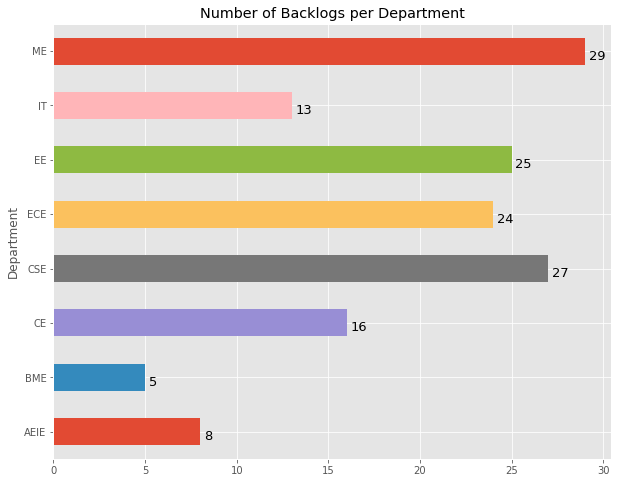

In [185]:
subplot = plot_df.groupby('Department')['Backlog Count'].sum().plot(kind='barh',figsize=(10,8))
subplot.set_title('Number of Backlogs per Department')
for i in subplot.patches:
    # get_width pulls left or right; get_y pushes up or down
    subplot.text(i.get_width()+.20, i.get_y()+.1, \
            str(i.get_width()), fontsize=13)

So, the department of **BME** is good enough. But there is another factor to be considered here - **Number of students per department**.

In [186]:
no_stu_dept_wise = data_2017.groupby('Department')['SL.NO.'].count().reset_index(name='Student Count')

In [187]:
no_stu_dept_wise.merge(plot_df,on='Department')

,Department,Student Count,Backlog Count
0,AEIE,54,8
1,BME,24,5
2,CE,68,16
3,CSE,135,27
4,ECE,125,24
5,EE,125,25
6,IT,79,13
7,ME,60,29


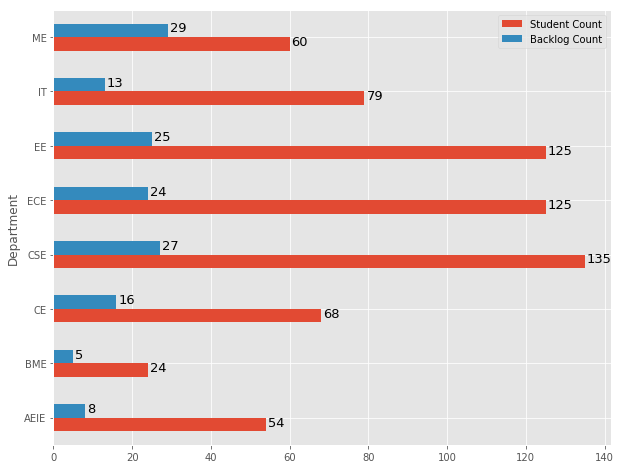

In [189]:
subplot = stu_backlog_count.groupby('Department').sum().plot(kind='barh',figsize=(10,8))
for i in subplot.patches:
    # get_width pulls left or right; get_y pushes up or down
    subplot.text(i.get_width()+.5, i.get_y()+.1, \
            str(i.get_width()), fontsize=13)

> To be continued.